# Integrating thye Michaelis-Menten rate Law

Some rate laws are not easily integrated without very advanced mathematics. For example, below is the rate law for an enzyme catalyzed reaction (the famous Michaelis-Menten equation) and its analytical intergrated form...

$$-\frac{d[S]}{dt} = V_{max}\frac{[S]}{K_M + [S]} $$

$$-\int_{[S]_0}^{[S]t}\frac{K_M + [S]}{[S]}{d[S]} = \int_{0}^{t}V_{max}dt   $$


$$ [S]_t = K_M \cdot {W}(\frac{[S]_0}{K_M} e^{\frac{[S]_0-V_{max}t}{K_M}}) $$

...where '$W$' is the Lambert function. The Lambert function is defined as a function satisfying $W(z)e^{W(z)} = z$

## Symbolic Integration

Let us attempt to solve the differential equation for the Michaelis-Menten equation. As before we will define the reaction progress as the amount of substrate consumed, $x$. We can then say that...

$$ [S] = [S]_0 - x $$

This enables us to solve the differential equation for x.

$$-\frac{d}{dt}([S]_0 - x) = V_{max}\frac{[S]_0 - x}{K_M + [S]_0 - x} $$

$$\frac{dx}{dt} = V_{max}\frac{[S]_0 - x}{K_M + [S]_0 - x} $$

Now we will apply the integration..

$$-\int_{0}^{x_t}\frac{K_M + [S]_0 - x}{[S]_0 - x}{dx} = \int_{0}^{t}V_{max}dt   $$

I have no skills to even begin to approach solving this integration. Fortunately *SymPy* will do it for me (I hope). Try the code below.


In [2]:
import sympy as sym

t = sym.symbols('t')           ### create x as a 'symbol', not a variable
Vmax = sym.symbols('V_{max}')  ### create k as a 'symbol'
St = sym.symbols('S_t')        ### create At as a 'symbol'
S0 = sym.symbols('S_0')        ### create A0 as a 'symbol'
KM = sym.symbols('K_M')

xt = sym.Function('x_t')       ### create x as a 'function', not a variable

lhs = sym.Derivative(-St, t)   ### Using Derivative function to get differential of A(t) w.r.t. t
                               ### could not used At.diff(t) because At is not a function 
rhs = Vmax*(St/(KM+St))

diffeq = sym.Eq(lhs, rhs)      ### create a sympy equation
print("The initial differential equation is...")
display(diffeq)                ### display that equation

diffeq = diffeq.subs({St: (S0 - xt(t))})

print("After substituting the differential equation is...")
display(diffeq)                ### display that equation


print("The integrated equation starting at x=0 when t=0 is...")
res = sym.dsolve(diffeq, ics={xt(0): 0})    ### Solve the differential equation. 
                                            ### Initial condition is x(t) = 0 when t = 0
display(res)

The initial differential equation is...


Eq(Derivative(-S_t, t), S_t*V_{max}/(K_M + S_t))

After substituting the differential equation is...


Eq(Derivative(-S_0 + x_t(t), t), V_{max}*(S_0 - x_t(t))/(K_M + S_0 - x_t(t)))

The integrated equation starting at x=0 when t=0 is...


Eq(x_t(t), -K_M*LambertW(-exp((K_M*log(-S_0) + S_0 - V_{max}*t)/K_M)/K_M) + S_0)

### Wow!

Wow! It worked! We now have an equation for the value of $x$ as a function of $t$. As before, we can replace the rhs of the equation with the expression for $x_t$. In the code above we had stated that...

$$ [S]_t = [S]_0 - x_t(t) $$

...and so we know that...

$$ x_t(t) = [S]_0 - [S]_t $$

Let us substitute this into the integrated rate equation using the code below...


In [3]:
### substitute x for So - St
eq = res.subs(xt(t), S0-St)
display(eq)

### Simplify the result
eq = sym.simplify(eq)
display(eq)

Eq(S_0 - S_t, -K_M*LambertW(-exp((K_M*log(-S_0) + S_0 - V_{max}*t)/K_M)/K_M) + S_0)

Eq(S_0 - S_t, -K_M*LambertW(S_0*exp((S_0 - V_{max}*t)/K_M)/K_M) + S_0)

SymPy did not fully simplify. Let us finish manually.

In [4]:
### Subtract S0 from both sides of the equation
eq = sym.Eq(eq.lhs - S0, eq.rhs - S0)

### take the negative of both sides of the equation 
eq = sym.Eq(-eq.lhs, -eq.rhs)

display(eq)

Eq(S_t, K_M*LambertW(S_0*exp((S_0 - V_{max}*t)/K_M)/K_M))

## Plot with *SymPy*

We can plot the function, strange Lambert functiona and all, using `sympy.plotting.plot()`. Consider the code below. Try different substrate consentrations and not the shape of the curve. You may have to change the plot limits as you go.

The integrated rate law for the MM equation


Eq(S_t, K_M*LambertW(S_0*exp((S_0 - V_{max}*t)/K_M)/K_M))

The expression that describes A(t) is...


Eq(S_t, 1.5*LambertW(1.29848936070312*exp(-6.6*t)))

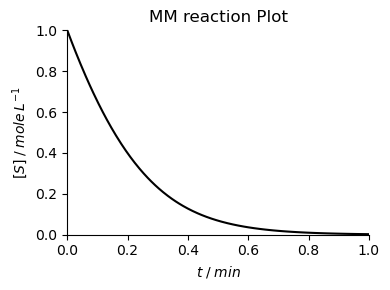

In [5]:
KM_value = 1.5        ### set KM value
Vmax_value = 9.9      ### set Vmax value
S0_value = 1.0        ### set initial substrate concentration value

time_end = 1          ### The end time
n_points = 100        ### number of points - increase if needed

xmax = time_end
ymax = S0_value

print("The integrated rate law for the MM equation")
display(eq)                         

St_expr = eq.rhs.subs({KM: KM_value,       ### substitute the values into the expression
                       Vmax: Vmax_value, 
                       S0:S0_value})

print("The expression that describes A(t) is...")
display(sym.Eq(St,St_expr))               ### The expression now has only one variable, t       

p = sym.plotting.plot(St_expr, (t,0,time_end),
                    line_color='black', 
                    title='MM reaction Plot',
                    xlabel = r"$t\;/\;min$",
                    ylabel = r"$[S] \; / \; mole\,L^{-1}$",
                    axis = True,
                    xlim = (0, xmax),
                    ylim = (0, ymax),
                    size = (4,3),
                    show = False
)
p.save("test.pdf")
p.show()


## Make It a Function

Let us now take this analytical integration of the Michaelis-Menten equation and convert it to a function as we have done previously. Then we can create a set of $x$ and $y$ values and plot the value of the substrate concentration, $[S]$, over time, $t$.

The integrated rate law for the MM equation


Eq(S_t, K_M*LambertW(S_0*exp((S_0 - V_{max}*t)/K_M)/K_M))

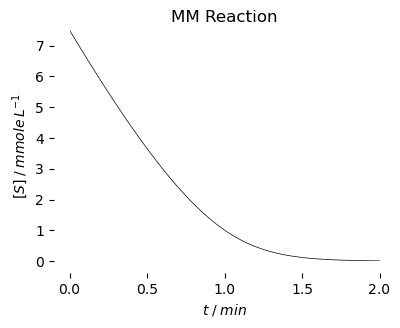

In [121]:
from matplotlib import pyplot as plt
import numpy as np

print("The integrated rate law for the MM equation")
display(eq)                         

##########################
### Set up parameters
##########################


KM_value = 2.1        ### set KM value
Vmax_value = 10.7      ### set Vmax value
S0_value = 7.5         ### set initial substrate concentration value

time_end = 2          ### The end time
n_points = 100        ### number of points - increase if needed

xmax = time_end       ### change these as you wish
ymax = S0_value

##########################
### create function 
##########################

f = sym.lambdify([t,S0, KM, Vmax], eq.rhs)   ### create function in terms of t, S0, KM and Vmax

##########################
### calculate x and y data
##########################

t_line = np.linspace(0,time_end,n_points)       ### the time points

x = t_line                                      ### I always plot x and y so I can more easily reuse plotting code
y = f(t_line, S0_value, KM_value, Vmax_value)   ### Calculate y according to the function
y = np.real(y)                                  ### the Lambert function produces imaginary numbers. Use on the real component

##########################
### plot x and y data
##########################

plt.rcdefaults()     ### resets the plot defaults so we always start in the same place
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,3))  

ax.plot( x, y,
         linestyle = '-',            ### use a line between points
         linewidth='0.5',            ### make the line thin
         color = 'black',            ### the line is black
         zorder = 0                  ### everything is in layer 0 (the bottom layer in this case)
        )
ax.set( xlabel= r"$t\;/\;min$", 
        ylabel=r"$[S] \; / \; mmole\,L^{-1}$",
        title = "MM Reaction",
        xlim=[0, xmax],                  
        ylim=[0, ymax]      
       )

ax.spines[['top','right','bottom','left']].set_visible(False)   ### Make all spines invisible
ax.spines[['left','bottom']].set_position(('axes',-0.05))   ### space spines a little away from 'axes' (plot box)

#########################################
### Output the plot
#########################################

plt.savefig("plot.pdf", bbox_inches='tight')     ### export the plot as this
plt.show() 

## Curve Fit to the Analytical Function

We now have a function that was created from the *SymPy* analytical integration of our rate law for Michaelis-Menten kinetics. We can curve fit this function against experimental data and get the parameters for $K_M$ and $V_{max}$ from a single experiment where we measure the concentration of product over time.

However the Lambert function that is built in to our integration will return complex numbers ($n+ij$) and the `scipy.optimize.curve_fit()` function cannot accept complex numbers. There may be ways around this within *SciPy* but my hasty web search directed me to a project called *LMFit* (More information can be [found here](https://lmfit.github.io/lmfit-py/))

In [42]:
from scipy.optimize import curve_fit 

#param, cov = curve_fit(f,x,y)      ### uncomment this and watch it explode

### Using *LMFit*

The *LMFit* library is built on top of *SciPy*. It has a number of improvements to the methods that *SciPy* uses to perform least-squares fits to curves. It is not part of the standard library and will have to be installed in Google Colab.

Examine the code below where we fit the reaction data to the function that represents the integrated equation.

In [112]:
#!pip install lmfit  ### uncomment to install if needed

import lmfit         ### must be installed with !pip install lmfit
                     ### uncertainties will be installed as a dependancy
                     ### for docs see https://lmfit.github.io/lmfit-py/


##########################
### experimental data 
##########################

time = np.array([0, 30, 45, 60, 75, 90, 105, 120])  ### the time points(every 15 seconds)
time = time/60                                       ### convert to minutes

conc = [2.50, 1.09, 0.62, 0.31, 0.14, 0.065, 0.019, 0.016]   ### measured concentration of substrate


##########################
### create function 
##########################

f = sym.lambdify([t,S0, KM, Vmax], eq.rhs)   ### create function in terms of t, S0, KM and Vmax


##########################
### use lmfit to fit data to function 
##########################

mod = lmfit.Model(f)                            # load the function f as the model to be fit
pars = mod.make_params(S_0=1, K_M=1, V_max=1)   # state the parameters (use the text strings that we used above in sympy)
                                                # initial values are also set here

result = mod.fit(conc, pars, t=time)            # use the .fit method on the model object to perform the curve fit
                                                # the variable in this function is 't' so we must use that in the call
##########################
### get the results 
##########################

print(result.fit_report())

S0_fit = result.uvars['S_0']         ### collect parameters as uncertain values
KM_fit = result.uvars['K_M']
Vmax_fit = result.uvars['V_max']


# Explore some other ways to extract results by uncommenting the code below

# print(result.var_names)
# display(result.params)
# print(result.covar)
# print(result.params['S_0'].stderr)
# print(result.rsquared)

# print(Vmax_fit.nominal_value)   ### access components of uncertain values
# print(Vmax_fit.std_dev)


[[Model]]
    Model(_lambdifygenerated)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 43
    # data points      = 16
    # variables        = 3
    chi-square         = 1.0540e-04
    reduced chi-square = 8.1077e-06
    Akaike info crit   = -184.885275
    Bayesian info crit = -182.567508
    R-squared          = 0.99997938
[[Variables]]
    S_0:    2.49975441 +/- 0.00283735 (0.11%) (init = 1)
    K_M:    1.46115619 +/- 0.03386285 (2.32%) (init = 1)
    V_max:  5.23618753 +/- 0.06675019 (1.27%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(K_M, V_max) = +0.9894
    C(S_0, V_max) = +0.3328
    C(S_0, K_M)   = +0.2465


### Plot the Fit Against Data

Below we will steal the code for plotting data against a curve fit and change it to use our function and data. Let's go.

/Users/blink/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


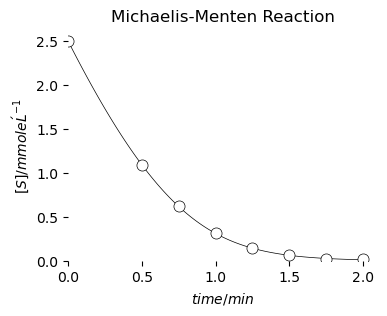

The Vmax is 5.236+/-0.067
The KM is 1.461+/-0.034
Initial conc is calculated to be 2.500+/-0.003


In [128]:
from matplotlib import pyplot as plt   ### load in the plotting tools from the MatPlotLib package
from scipy.optimize import curve_fit   ### load in the curve_fit function from the SciPy package
import numpy as np

#########################################
### Set up the data lists
#########################################

x = time
y = conc

#########################################
### Create curve fit function
#########################################
                   
def MM_fit(s, Vmax, KM):            ### a function that accepts a list of x values and values for slope and intercept
    v = Vmax * (s / (s + KM))       ### then calculates values for y
    return v                        ### and send then back as the result of the function

parameters, statistics = curve_fit(MM_fit, x, y)

Vmax, KM = parameters               ### the parameters contains slope and intercept, in order

perr = np.sqrt(np.diag(statistics)) ### the statistics object can be used to calculate standard deviations
Vmax_stdev, KM_stdev = perr         ### the standard errors for slope and intercept accessed in order

#########################################
### Make a line using the calculate slope and intercept
#########################################

S0_value =  S0_fit.nominal_value
KM_value = KM_fit.nominal_value
Vmax_value = Vmax_fit.nominal_value 


max_x = np.max(x)                   ### obtain the maximum x value
x_fit = np.linspace(0, max_x, 100)  ### Make an array of 100 points between zero and the max x value

y_fit = f(t_line, S0_value, KM_value, Vmax_value)     ### calculate the y values using the function that we curve fit
            
#########################################
### Make a figure onject that contains a single axis object
### the pyplot.subplots command will ctraete these two objects
#########################################

plt.rcdefaults()                    ### resets the plot defaults so we always start in the same place
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,3))  

#########################################
### Plot the line using the x_fit, y_fit points
#########################################

ax.plot(x_fit, y_fit, 
        linestyle = '-',            ### use a line between points
        linewidth='0.5',            ### make the line thin
        color = 'black',            ### the line is black
        zorder = 0                  ### everything is in layer 0 (the bottom layer in this case)
        )

#########################################
### Plot the data with style
#########################################

ax.scatter(x, y, 
        marker='o',                 ### Plot the x and y data 
        color='white',              ### markers are this color
        edgecolors = 'black',       ### outline of markers is this color
        linewidths = 0.5,           ### outline of markers is this wide
        s=64,                       ### "s" is "size". sqrt(64) = 8 points wide
        zorder = 1                  ### everything is in layer 1 (the top layer in this case)
        )

#########################################
### Add more style
#########################################

ax.set(ylabel=r"$[S] / mmole\'L^{-1}$", 
        xlabel=r"$time / min$",
        title = "Michaelis-Menten Reaction",
        xlim=[0, None],                  
        ylim=[0, None]      
      )

ax.spines['right'].set_visible(False)   ### Make right spine invisible
ax.spines['top'].set_visible(False)     ### Make top spine invisible
ax.spines['left'].set_visible(False)    ### Make left spine invisible
ax.spines['bottom'].set_visible(False)  ### Make bottom spine invisible

#########################################
### Output the plot
#########################################

plt.savefig("plot.pdf", bbox_inches='tight')     ### export the plot as this
plt.show()                                       ### display the plot in this notebook

print(f"The Vmax is {Vmax_fit:0.3f}")
print(f"The KM is {KM_fit:0.3f}")                   ### display the plot in this notebook
print(f"Initial conc is calculated to be {S0_fit:0.3f}")

In [122]:


print(Vmax_fit.nominal_value)
print(Vmax_fit.std_dev)


5.236187533944633
0.06675018914067331


In [71]:
### Make Fake Data for curve fit

##########################
### Set up parameters
##########################


KM_value = 1.5        ### set KM value
Vmax_value = 5.3      ### set Vmax value
S0_value = 2.5        ### set initial substrate concentration value


##########################
### create function 
##########################

f = sym.lambdify([t,S0, KM, Vmax], eq.rhs)   ### create function in terms of t, S0, KM and Vmax

##########################
### calculate x and y data
##########################

t_line = np.array([15, 30, 45, 60, 75, 90, 105, 120])  ### the time points(every 15 seconds)
t_line = t_line/60                                     ### convert to minutes

xdat = t_line                                      ### I always plot x and y so I can more easily reuse plotting code
ydat = f(t_line, S0_value, KM_value, Vmax_value)      ### Calculate y according to the function
ydat = np.real(ydat)  
#ydat = np.complex128(y)
print(xdat,ydat)
ydat_old = ydat
ydat = ydat + np.random.normal(scale=0.003, size=xdat.size)

print(xdat,ydat)
errors = ((ydat-ydat_old))
print(errors)

[0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ] [1.72852951 1.09217686 0.61897403 0.31365042 0.14508538 0.06333811
 0.02682926 0.0112074 ]
[0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ] [1.72653529 1.09094275 0.62333815 0.30771745 0.14096853 0.06463756
 0.0186093  0.01569788]
[-0.00199422 -0.00123411  0.00436411 -0.00593297 -0.00411686  0.00129945
 -0.00821996  0.00449048]
